In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2025/players.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_7.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_9.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_6.csv
/kaggle/input/nfl-big-data-bowl-2025/games.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_8.csv
/kaggle/input/nfl-big-data-bowl-2025/player_play.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_4.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_3.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_5.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_1.csv
/kaggle/input/nfl-big-data-bowl-2025/plays.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv


This notebook focuses on how the trend of the offensive strategy used
in the accumulation of the game that is recorded in the NFL Big Data 2025 dataset. This analysis will benefit the coach, NFL analyst, and NFL fan in arranging a good offence strategy for further games.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import Image, display
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

# plays.csv

In [3]:
plays_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/plays.csv')
plays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16124 entries, 0 to 16123
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gameId                            16124 non-null  int64  
 1   playId                            16124 non-null  int64  
 2   playDescription                   16124 non-null  object 
 3   quarter                           16124 non-null  int64  
 4   down                              16124 non-null  int64  
 5   yardsToGo                         16124 non-null  int64  
 6   possessionTeam                    16124 non-null  object 
 7   defensiveTeam                     16124 non-null  object 
 8   yardlineSide                      15900 non-null  object 
 9   yardlineNumber                    16124 non-null  int64  
 10  gameClock                         16124 non-null  object 
 11  preSnapHomeScore                  16124 non-null  int64  
 12  preS

The Play.csv file used in this notebook contains 50 columns of integer, object, float, and bool data. These data also have numerical and categorical values. This data frame explains in detail how the play happened in a game.

## Asessing Data

In [4]:
print("""Missing values detection:
""")
plays_df.isna().sum()

Missing values detection:



gameId                                  0
playId                                  0
playDescription                         0
quarter                                 0
down                                    0
yardsToGo                               0
possessionTeam                          0
defensiveTeam                           0
yardlineSide                          224
yardlineNumber                          0
gameClock                               0
preSnapHomeScore                        0
preSnapVisitorScore                     0
playNullifiedByPenalty                  0
absoluteYardlineNumber                  0
preSnapHomeTeamWinProbability           0
preSnapVisitorTeamWinProbability        0
expectedPoints                          0
offenseFormation                      188
receiverAlignment                     188
playClockAtSnap                         1
passResult                           6388
passLength                           7398
targetX                           

In [5]:
print("Duplicated value: ", plays_df.duplicated().sum())

Duplicated value:  0


**Insight:**

* There is no duplicated value
* There are missing values in (yardlineSide, offenseFormation, receiverAlignment, playClockAtSnap, passResult, passLength, targetX, targetY, dropbackType, dropbackDistance, passLocationType, timeToThrow, timeInTackleBox, timeToSack, passTippedAtLine, unblockedPressure, qbSpike, qbSneak, rushLocationType, penaltyYards, pff_runConceptPrimary, pff_runConceptSecondary, pff_passCoverage, pff_manZone)

## Cleaning the data

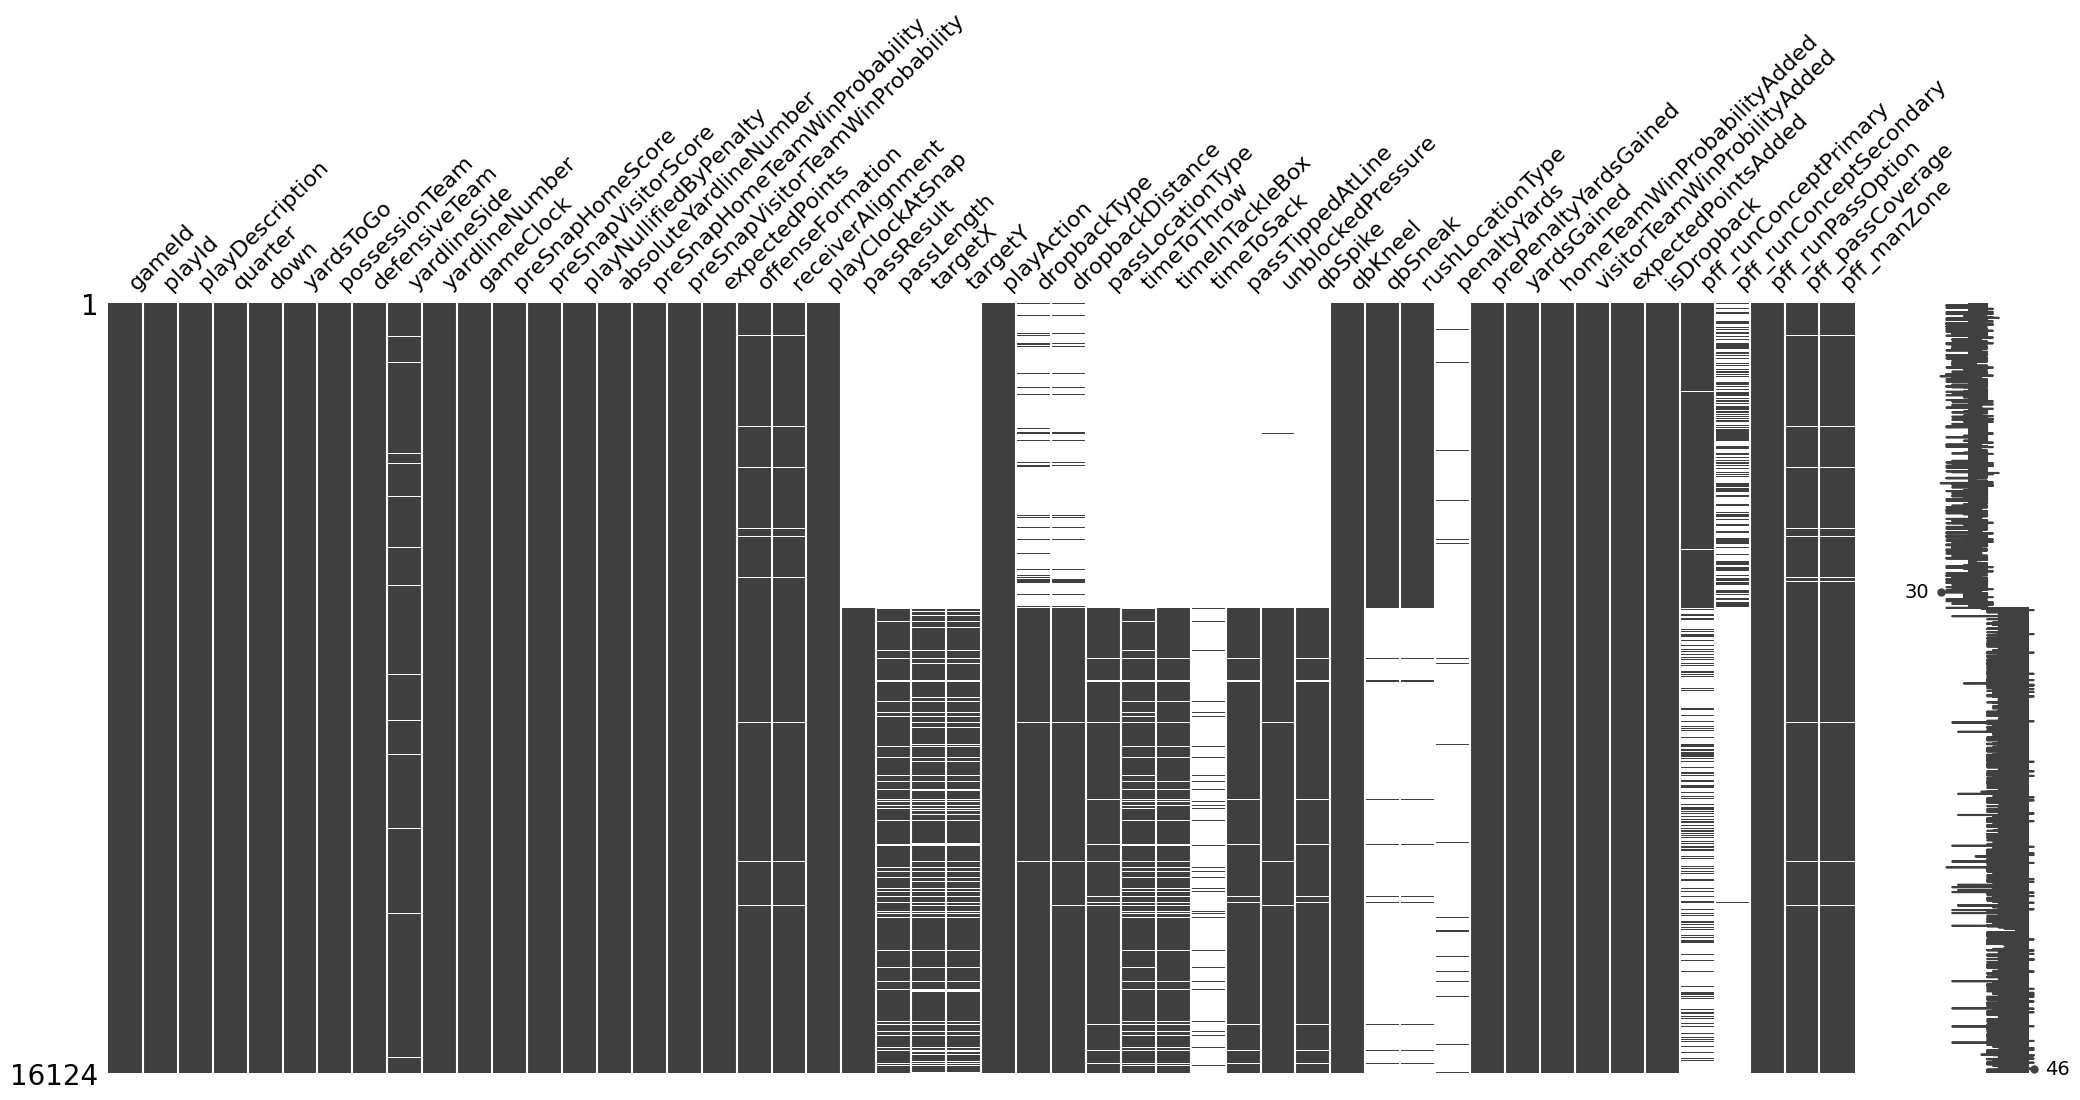

In [6]:
msno.matrix(plays_df.sort_values(by='isDropback'))
plt.show()

In [7]:
#for columns in plays_df:
#    y = plays_df.sort_values(by=columns, ascending=True)
#    msno.matrix(y)
#    plt.title(f"Sort by {columns}", fontsize=25)
#    plt.show()

Only isDropback column that have corelation to missing value of other columns. Hence the other column that have missing value tend to influence the missng of values of each others. It indicate that the missing values is representation of the actual condition.

In [8]:
plays_df.sort_values(by=['gameId', 'playId'], ascending=True, inplace=True)

# Trend Offensife Strategy 

Some columns need to be seen closely to focus on offensive strategy analysis. Of course, those features are very related to offensive play in the game. Those features are offenseFormation, receiverAlignment, dropbackType, passLocationType,passResult, passLength, and yardsGained.

In [9]:
a_plays_df = plays_df.groupby(by='offenseFormation').gameId.count().sort_values(ascending=False).reset_index()
a_plays_df.rename(columns={'gameId': 'count'}, inplace=True)

b_plays_df = plays_df[plays_df['offenseFormation'] == 'SHOTGUN'].groupby(by='receiverAlignment').gameId.count().sort_values(ascending=False).reset_index()
b_plays_df.rename(columns={'gameId': 'count'}, inplace=True)

c_plays_df = plays_df[(plays_df['offenseFormation'] == 'SHOTGUN') & (plays_df['receiverAlignment'] == '2x2')].groupby(by='dropbackType').gameId.count().sort_values(ascending=False).reset_index()
c_plays_df.rename(columns={'gameId': 'count'}, inplace=True)

d_plays_df = plays_df[(plays_df['offenseFormation'] == 'SHOTGUN') & (plays_df['receiverAlignment'] == '2x2') & (plays_df['dropbackType'] == 'TRADITIONAL')].groupby(by='passLocationType').gameId.count().sort_values(ascending=False).reset_index()
d_plays_df.rename(columns={'gameId': 'count'}, inplace=True)

e_plays_df = plays_df[(plays_df['offenseFormation'] == 'SHOTGUN') & (plays_df['receiverAlignment'] == '2x2') & (plays_df['dropbackType'] == 'TRADITIONAL') & (plays_df['passLocationType'] == 'INSIDE_BOX')].groupby(by='passResult').gameId.count().sort_values(ascending=False).reset_index()
e_plays_df.rename(columns={'gameId': 'count'}, inplace=True)

f_plays_df = plays_df[(plays_df['offenseFormation'] == 'SHOTGUN') & (plays_df['receiverAlignment'] == '2x2') & (plays_df['dropbackType'] == 'TRADITIONAL') & (plays_df['passLocationType'] == 'INSIDE_BOX') & (plays_df['passResult'] == 'C')].groupby(by='passLength').gameId.count().sort_values(ascending=False).reset_index()
f_plays_df.rename(columns={'gameId': 'count'}, inplace=True)

g_plays_df = plays_df[(plays_df['offenseFormation'] == 'SHOTGUN') & (plays_df['receiverAlignment'] == '2x2') & (plays_df['dropbackType'] == 'TRADITIONAL') & (plays_df['passLocationType'] == 'INSIDE_BOX') & (plays_df['passResult'] == 'C') & (plays_df['passLength'] == 5.0)].groupby(by='yardsGained').gameId.count().sort_values(ascending=False).reset_index()
g_plays_df.rename(columns={'gameId': 'count'}, inplace=True)

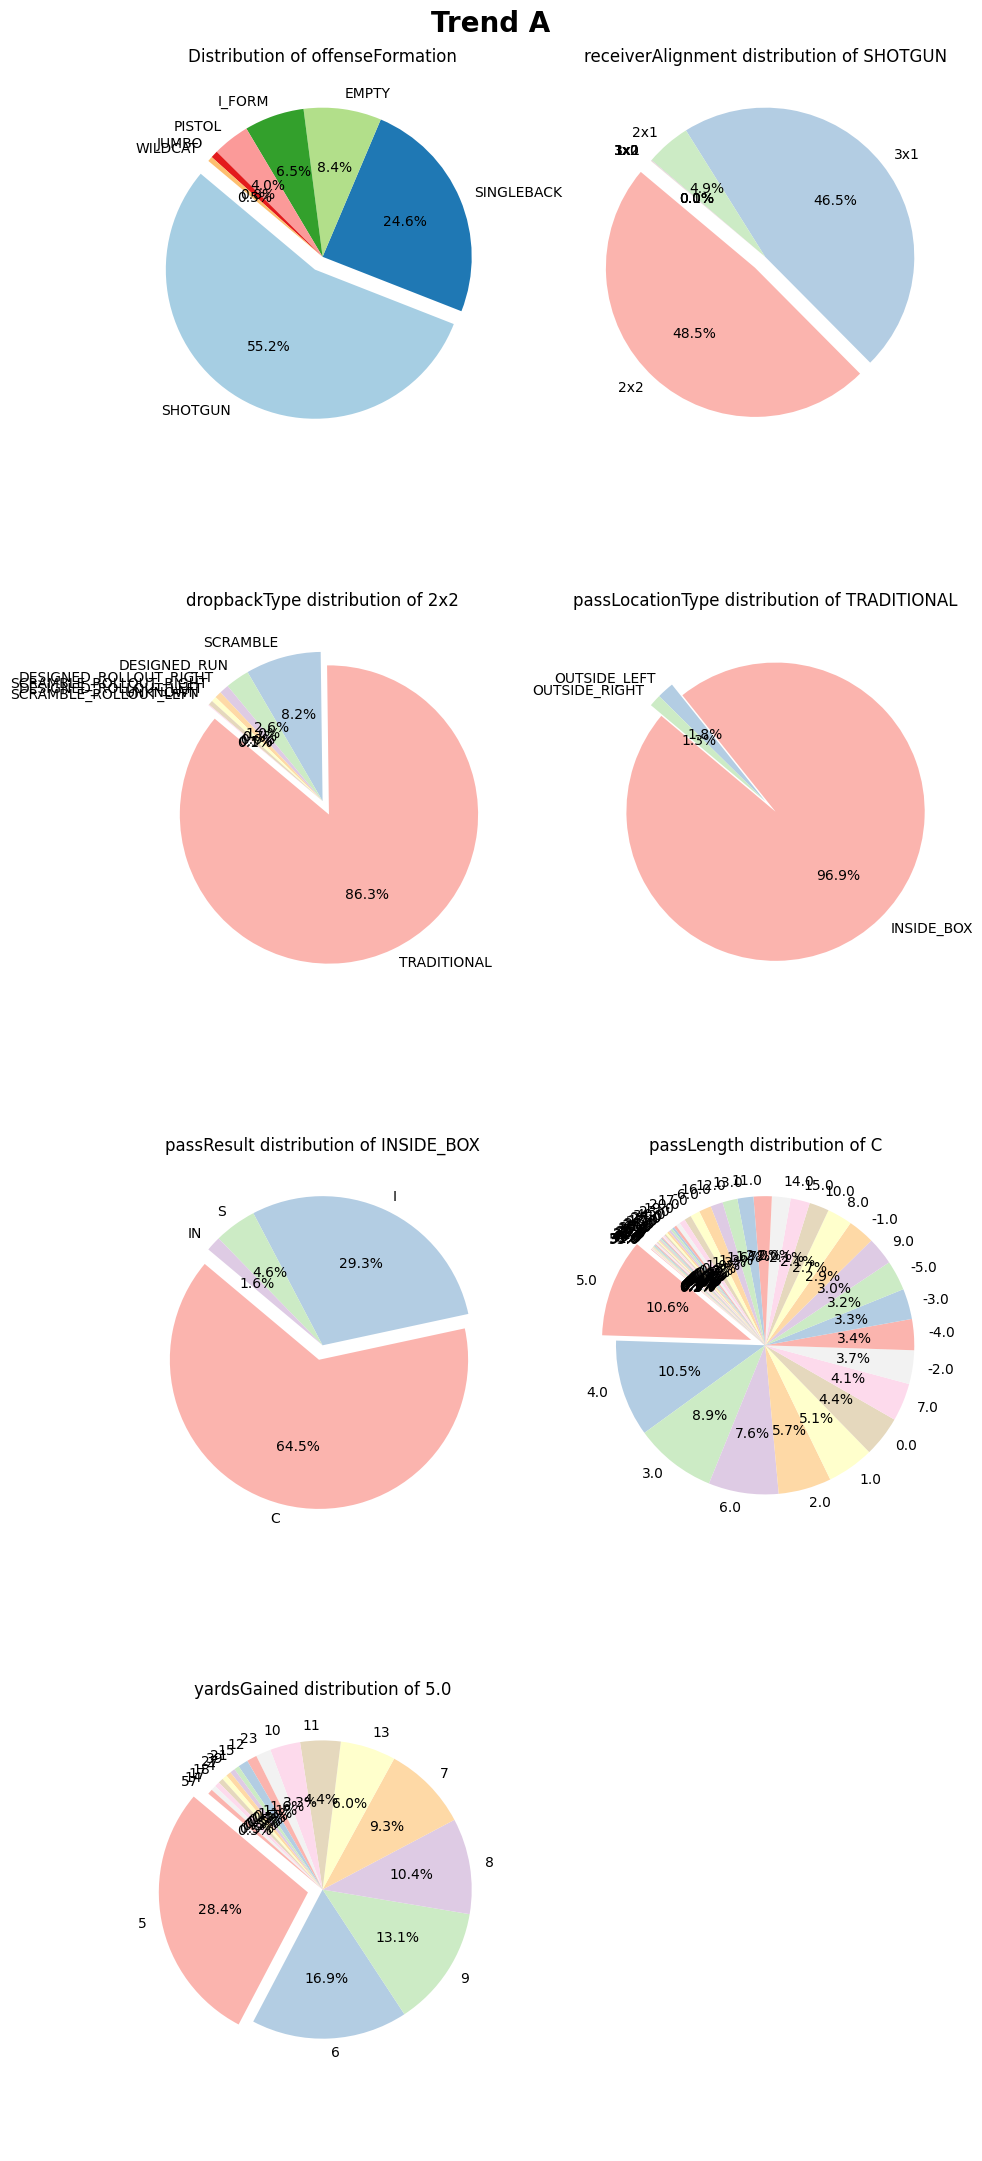

In [10]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 22))

# First pie chart
max_index = a_plays_df['count'].idxmax()
explode = [0.1 if i == max_index else 0 for i in range(len(a_plays_df['count']))]
ax[0, 0].pie(
    a_plays_df['count'], 
    labels=a_plays_df['offenseFormation'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode,
    colors=plt.cm.Paired.colors
)
ax[0, 0].set_title("Distribution of offenseFormation")

# Second pie chart
max_index = b_plays_df['count'].idxmax()
explode = [0.1 if i == max_index else 0 for i in range(len(b_plays_df['count']))]
ax[0, 1].pie(
    b_plays_df['count'], 
    labels=b_plays_df['receiverAlignment'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode,
    colors=plt.cm.Pastel1.colors
)
ax[0, 1].set_title("receiverAlignment distribution of SHOTGUN")

max_index = c_plays_df['count'].idxmax()
explode = [0.1 if i == max_index else 0 for i in range(len(c_plays_df['count']))]
ax[1, 0].pie(
    c_plays_df['count'], 
    labels=c_plays_df['dropbackType'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode,
    colors=plt.cm.Pastel1.colors
)
ax[1, 0].set_title("dropbackType distribution of 2x2")

max_index = d_plays_df['count'].idxmax()
explode = [0.1 if i == max_index else 0 for i in range(len(d_plays_df['count']))]
ax[1, 1].pie(
    d_plays_df['count'], 
    labels=d_plays_df['passLocationType'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode,
    colors=plt.cm.Pastel1.colors
)
ax[1, 1].set_title("passLocationType distribution of TRADITIONAL")

max_index = e_plays_df['count'].idxmax()
explode = [0.1 if i == max_index else 0 for i in range(len(e_plays_df['count']))]
ax[2, 0].pie(
    e_plays_df['count'], 
    labels=e_plays_df['passResult'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode,
    colors=plt.cm.Pastel1.colors
)
ax[2, 0].set_title("passResult distribution of INSIDE_BOX")

max_index = f_plays_df['count'].idxmax()
explode = [0.1 if i == max_index else 0 for i in range(len(f_plays_df['count']))]
ax[2, 1].pie(
    f_plays_df['count'], 
    labels=f_plays_df['passLength'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode,
    colors=plt.cm.Pastel1.colors
)
ax[2, 1].set_title("passLength distribution of C")

max_index = g_plays_df['count'].idxmax()
explode = [0.1 if i == max_index else 0 for i in range(len(g_plays_df['count']))]
ax[3, 0].pie(
    g_plays_df['count'], 
    labels=g_plays_df['yardsGained'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode,
    colors=plt.cm.Pastel1.colors
)
ax[3, 0].set_title("yardsGained distribution of 5.0")

ax[3, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.suptitle("Trend A", fontsize=20, fontweight='bold')
plt.show()

These figures show the trend of offence play strategy. Based on figures, 55.2 % of offenseFormation used is SHOTGUN. In SHOTGUN formation the higher of receiverAlignment used is 2x2 by 48.5%. Then followed by 86.3% of TRADITIONAL dropbackType. In TRADITIONAL dropbackType, 96.9% of passLocationType used is INSIDE_BOX. This is followed by a 64.5% complete pass that passes 5 yards of passLength. Finally, the 5 yards become the higher yardsGain by 28.4%. By this image, there is a trend of offensive strategy captured. The trend is SHOTGUN - 2x2 - TRADITIONAL - INSIDE_BOX - C - 5.0 - 5.

On receiverAlignment distribution of SHOTGUN, the difference between 2x2 and 3x1 is slight. This leads to an assumption that another trend needs to be analysed.

In [11]:
h_plays_df = plays_df[(plays_df['offenseFormation'] == 'SHOTGUN') & (plays_df['receiverAlignment'] == '3x1')].groupby(by='dropbackType').gameId.count().sort_values(ascending=False).reset_index()
h_plays_df.rename(columns={'gameId': 'count'}, inplace=True)

i_plays_df = plays_df[(plays_df['offenseFormation'] == 'SHOTGUN') & (plays_df['receiverAlignment'] == '3x1') & (plays_df['dropbackType'] == 'TRADITIONAL')].groupby(by='passLocationType').gameId.count().sort_values(ascending=False).reset_index()
i_plays_df.rename(columns={'gameId': 'count'}, inplace=True)

j_plays_df = plays_df[(plays_df['offenseFormation'] == 'SHOTGUN') & (plays_df['receiverAlignment'] == '3x1') & (plays_df['dropbackType'] == 'TRADITIONAL') & (plays_df['passLocationType'] == 'INSIDE_BOX')].groupby(by='passResult').gameId.count().sort_values(ascending=False).reset_index()
j_plays_df.rename(columns={'gameId': 'count'}, inplace=True)

k_plays_df = plays_df[(plays_df['offenseFormation'] == 'SHOTGUN') & (plays_df['receiverAlignment'] == '3x1') & (plays_df['dropbackType'] == 'TRADITIONAL') & (plays_df['passLocationType'] == 'INSIDE_BOX') & (plays_df['passResult'] == 'C')].groupby(by='passLength').gameId.count().sort_values(ascending=False).reset_index()
k_plays_df.rename(columns={'gameId': 'count'}, inplace=True)

l_plays_df = plays_df[(plays_df['offenseFormation'] == 'SHOTGUN') & (plays_df['receiverAlignment'] == '3x1') & (plays_df['dropbackType'] == 'TRADITIONAL') & (plays_df['passLocationType'] == 'INSIDE_BOX') & (plays_df['passResult'] == 'C') & (plays_df['passLength'] == 4.0)].groupby(by='yardsGained').gameId.count().sort_values(ascending=False).reset_index()
l_plays_df.rename(columns={'gameId': 'count'}, inplace=True)

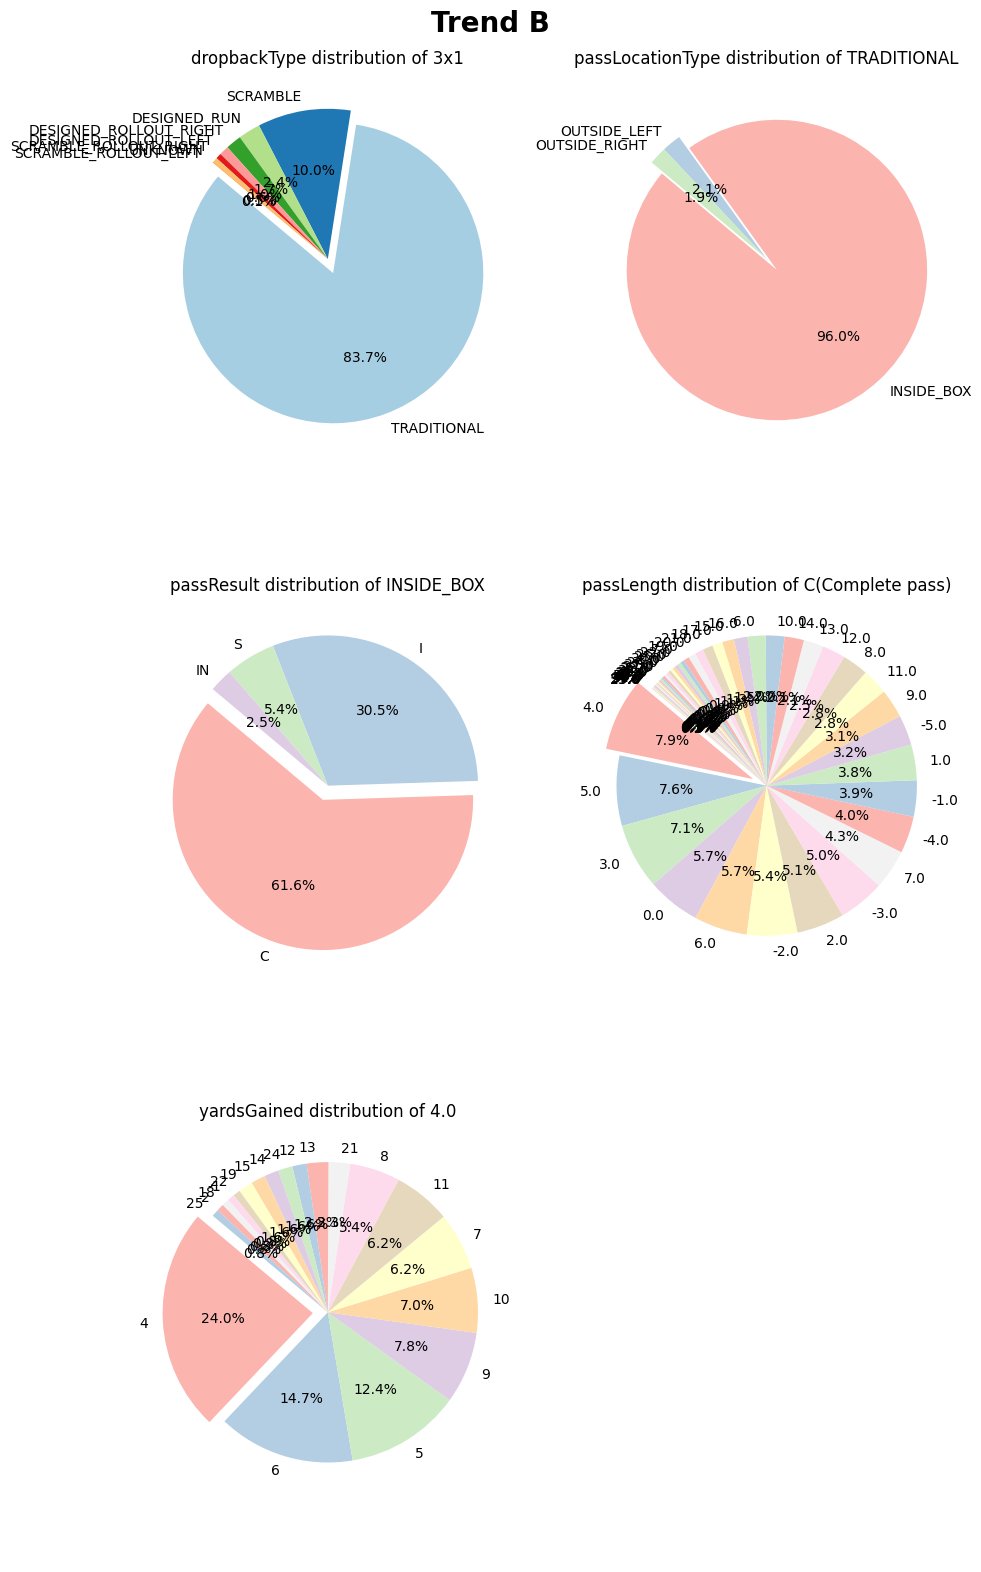

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 16))

# First pie chart
max_index = h_plays_df['count'].idxmax()
explode = [0.1 if i == max_index else 0 for i in range(len(h_plays_df['count']))]
ax[0, 0].pie(
    h_plays_df['count'], 
    labels=h_plays_df['dropbackType'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode,
    colors=plt.cm.Paired.colors
)
ax[0, 0].set_title("dropbackType distribution of 3x1")

# Second pie chart
max_index = i_plays_df['count'].idxmax()
explode = [0.1 if i == max_index else 0 for i in range(len(i_plays_df['count']))]
ax[0, 1].pie(
    i_plays_df['count'], 
    labels=i_plays_df['passLocationType'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode,
    colors=plt.cm.Pastel1.colors
)
ax[0, 1].set_title("passLocationType distribution of TRADITIONAL")

max_index = j_plays_df['count'].idxmax()
explode = [0.1 if i == max_index else 0 for i in range(len(j_plays_df['count']))]
ax[1, 0].pie(
    j_plays_df['count'], 
    labels=j_plays_df['passResult'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode,
    colors=plt.cm.Pastel1.colors
)
ax[1, 0].set_title("passResult distribution of INSIDE_BOX")

max_index = k_plays_df['count'].idxmax()
explode = [0.1 if i == max_index else 0 for i in range(len(k_plays_df['count']))]
ax[1, 1].pie(
    k_plays_df['count'], 
    labels=k_plays_df['passLength'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode,
    colors=plt.cm.Pastel1.colors
)
ax[1, 1].set_title("passLength distribution of C(Complete pass)")

max_index = l_plays_df['count'].idxmax()
explode = [0.1 if i == max_index else 0 for i in range(len(l_plays_df['count']))]
ax[2, 0].pie(
    l_plays_df['count'], 
    labels=l_plays_df['yardsGained'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode,
    colors=plt.cm.Pastel1.colors
)
ax[2, 0].set_title("yardsGained distribution of 4.0")


ax[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.suptitle("Trend B", fontsize=20, fontweight='bold')
plt.show()

In the trend B images, 83.7% of dropbackType distribution of 3x1 is TRADITIONAL. This dropbackType is followed by 96.0% of INSIDE_BOX passLocationType. 61.6% complete pass following passResult of the B trend. The 4 yards passLength is 7.9% of complete passes that follow by 4 yards of yardGaind by 24.0%. The trend captured is SHOTGUN - 3x1 - TRADITIONAL - INSIDE_BOX - C - 4.0 - 4.

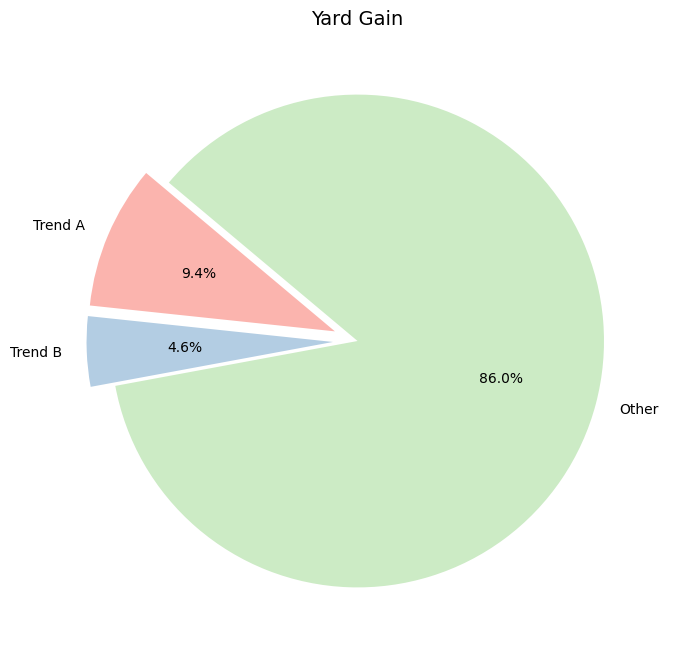

In [13]:
YGA = (g_plays_df['yardsGained']*g_plays_df['yardsGained']).sum()
YGB = (l_plays_df['yardsGained']*l_plays_df['yardsGained']).sum()
TYG = plays_df['yardsGained'].sum()

values = [YGA, YGB, TYG-(YGA+YGB)]
labels = ['Trend A','Trend B', 'Other']

explode = [0.1, 0.1, 0]

plt.figure(figsize=(8, 8))
plt.pie(
    values, 
    labels=labels, 
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=plt.cm.Pastel1.colors
)

plt.title("Yard Gain", fontsize=14)

plt.show()


This image shows the comparison of Trend A and Trend B by the yard gain of every play game. It seems that Trend A is lead by 9.4% followed by Trend B by 4.6%. This bar chart also informs that the trend is not in the majority of playing of the game. There are numerous variations in how a strategy of offensive is arranged in 86.0% of others' labels.

# Yard Gain Analysis

From the previous analysis, there is an indication that a wide variation of strategy is used to achieve great yards gain. From the yard Gain bar chart, 86.0% of the other category is too big not to be considered. Trends A and B are only 14% of the total game that produces yard gain. In this section, another analysis was conducted to get a better understanding of gaining yards in a game.

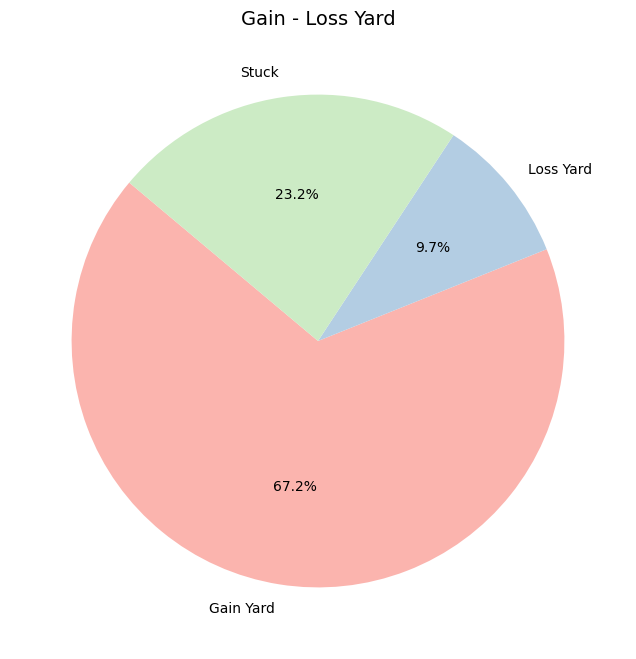

In [14]:
YG = (plays_df['yardsGained'][plays_df['yardsGained']> 0]).count()
YL = np.abs((plays_df['yardsGained'][plays_df['yardsGained']< 0]).count())
YS = (plays_df['yardsGained'][plays_df['yardsGained'] == 0]).count()

values = [YG, YL, YS]
labels = ['Gain Yard','Loss Yard', 'Stuck']

plt.figure(figsize=(8, 8))
plt.pie(
    values, 
    labels=labels, 
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)

plt.title("Gain - Loss Yard", fontsize=14)
plt.show()


In [15]:
YG_plays_df = plays_df[plays_df['yardsGained']> 0]

In [16]:
G_YG_plays_df = YG_plays_df.groupby(by='yardsGained').gameId.count().reset_index()
G_YG_plays_df.rename(columns={'gameId': 'count'}, inplace=True)

Text(0.5, 1.0, 'Gain Yard Demographic')

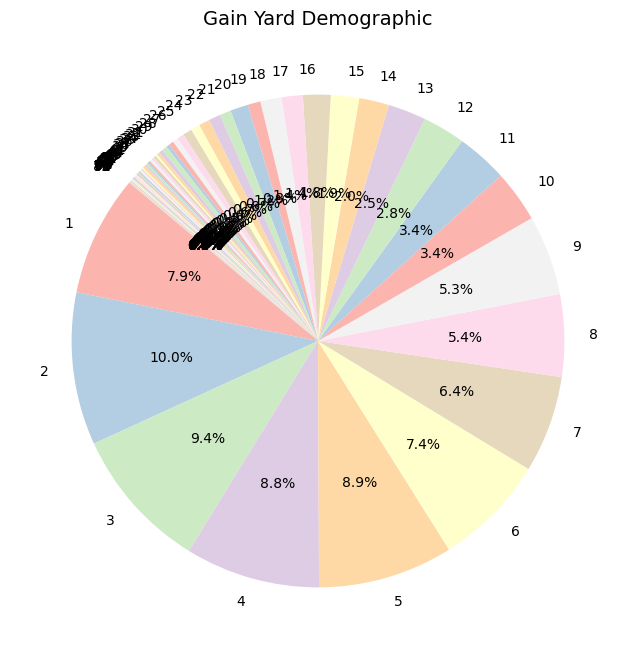

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(
    G_YG_plays_df['count'], 
    labels=G_YG_plays_df['yardsGained'], 
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)

plt.title("Gain Yard Demographic", fontsize=14)

Text(0.5, 1.0, 'Number of yardsGained')

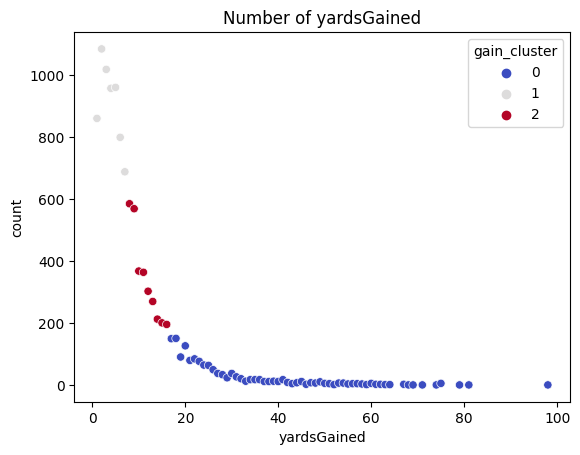

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)

G_YG_plays_df['gain_cluster'] = kmeans.fit_predict(G_YG_plays_df)

sns.scatterplot(data=G_YG_plays_df, x='yardsGained', y='count', hue='gain_cluster', palette='coolwarm')
plt.title('Number of yardsGained')

In [19]:
G_YG_plays_df.groupby(by='gain_cluster').agg({
    'yardsGained': ['min','max', 'sum', 'count'],
    'count': 'sum',
})

yardsGained                 count
                     min max   sum count   sum
gain_cluster                                  
0                     17  98  2626    57  1398
1                      1   7    28     7  6366
2                      8  16   108     9  3069

By the overall game, Gain - Loss Yard figure shows that the gain yard lead by 67.2% and followed by stuck and loss yard by 23.2% and 9.7% respectively. The demographic of the yard gain showed a wide range of values. This value is clustered using K-Means to find a cluster that has optimal yard gain and analyze that. It seems that the optimum cluster is between 17 and 98 yards gain. This cluster was then used for further analysis.

In [20]:
O_YG_plays_df = YG_plays_df[['playId', 'offenseFormation', 'receiverAlignment', 'dropbackType', 'passLocationType', 'passResult', 'passLength', 'yardsGained']][YG_plays_df['yardsGained'] > 16]

In [21]:
counts = (
    O_YG_plays_df
    .groupby(['passLength', 'yardsGained'])
    .size()
    .reset_index(name='counts')
)
O_YG_plays_df = O_YG_plays_df.merge(counts, on=['passLength', 'yardsGained'], how='left')

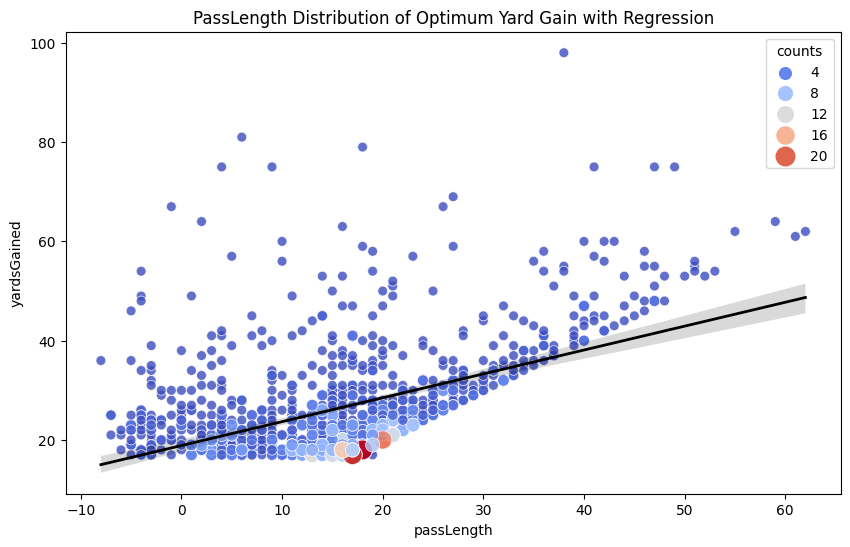

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot
sns.scatterplot(
    data=O_YG_plays_df, 
    x='passLength', 
    y='yardsGained', 
    hue='counts', 
    size='counts', 
    palette='coolwarm', 
    sizes=(50, 200), 
    alpha=0.8, 
    ax=ax
)

# Regression line
sns.regplot(
    data=O_YG_plays_df, 
    x='passLength', 
    y='yardsGained', 
    scatter=False,  # Hide scatter points in regplot
    ax=ax, 
    color='black',  # Line color
    line_kws={'linewidth': 2}  # Line width
)

# Add title and show
ax.set_title('PassLength Distribution of Optimum Yard Gain with Regression')
plt.show()


This scatter graft shows that the majority amount of data is between 15 and 20 passLength and 10 and 20 yardsGained. By using regression, the images show a correlation between passLength and yardGained and the prediction.

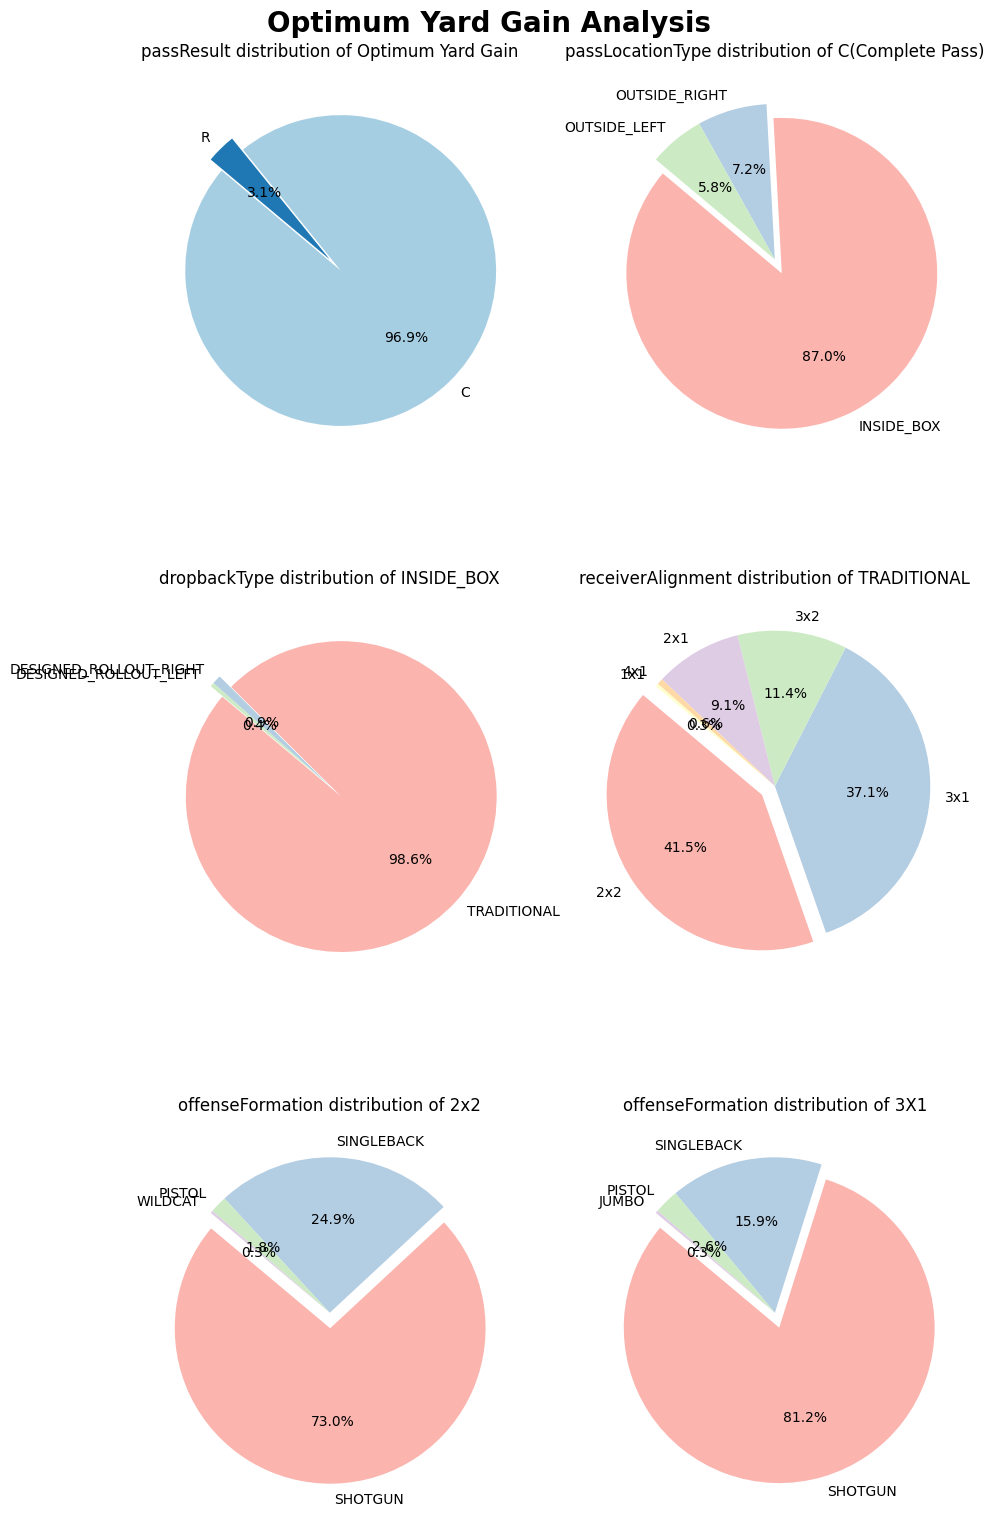

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 16))

# First pie chart
counts_df = O_YG_plays_df['passResult'].value_counts().reset_index()
counts_df.columns = ['passResult', 'count']
max_index = counts_df['count'].idxmax()
explode = [0.1 if i == max_index else 0 for i in range(len(counts_df['count']))]
ax[0, 0].pie(
    counts_df['count'], 
    labels=counts_df['passResult'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode,
    colors=plt.cm.Paired.colors
)
ax[0, 0].set_title("passResult distribution of Optimum Yard Gain")

# Second pie chart
counts_df = O_YG_plays_df[['passLocationType']][O_YG_plays_df['passResult'] == 'C'].value_counts().reset_index()
counts_df.columns = ['passLocationType', 'count']
max_index = counts_df['count'].idxmax()
explode = [0.1 if i == max_index else 0 for i in range(len(counts_df['count']))]
ax[0, 1].pie(
    counts_df['count'], 
    labels=counts_df['passLocationType'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode,
    colors=plt.cm.Pastel1.colors
)
ax[0, 1].set_title("passLocationType distribution of C(Complete Pass)")

counts_df = O_YG_plays_df[['dropbackType']][(O_YG_plays_df['passResult'] == 'C') & (O_YG_plays_df['passLocationType'] == 'INSIDE_BOX')].value_counts().reset_index()
counts_df.columns = ['dropbackType', 'count']
max_index = counts_df['count'].idxmax()
explode = [0.1 if i == max_index else 0 for i in range(len(counts_df['count']))]
ax[1, 0].pie(
    counts_df['count'], 
    labels=counts_df['dropbackType'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode,
    colors=plt.cm.Pastel1.colors
)
ax[1, 0].set_title("dropbackType distribution of INSIDE_BOX")

counts_df = O_YG_plays_df[['receiverAlignment']][(O_YG_plays_df['passResult'] == 'C') & (O_YG_plays_df['passLocationType'] == 'INSIDE_BOX') & (O_YG_plays_df['dropbackType'] == 'TRADITIONAL')].value_counts().reset_index()
counts_df.columns = ['receiverAlignment', 'count']
max_index = counts_df['count'].idxmax()
explode = [0.1 if i == max_index else 0 for i in range(len(counts_df['count']))]
ax[1, 1].pie(
    counts_df['count'], 
    labels=counts_df['receiverAlignment'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode,
    colors=plt.cm.Pastel1.colors
)
ax[1, 1].set_title("receiverAlignment distribution of TRADITIONAL")

counts_df = O_YG_plays_df[['offenseFormation']][(O_YG_plays_df['passResult'] == 'C') & (O_YG_plays_df['passLocationType'] == 'INSIDE_BOX') & (O_YG_plays_df['dropbackType'] == 'TRADITIONAL') & (O_YG_plays_df['receiverAlignment'] == '2x2')].value_counts().reset_index()
counts_df.columns = ['offenseFormation', 'count']
max_index = counts_df['count'].idxmax()
explode = [0.1 if i == max_index else 0 for i in range(len(counts_df['count']))]
ax[2, 0].pie(
    counts_df['count'], 
    labels=counts_df['offenseFormation'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode,
    colors=plt.cm.Pastel1.colors
)
ax[2, 0].set_title("offenseFormation distribution of 2x2")

counts_df = O_YG_plays_df[['offenseFormation']][(O_YG_plays_df['passResult'] == 'C') & (O_YG_plays_df['passLocationType'] == 'INSIDE_BOX') & (O_YG_plays_df['dropbackType'] == 'TRADITIONAL') & (O_YG_plays_df['receiverAlignment'] == '3x1')].value_counts().reset_index()
counts_df.columns = ['offenseFormation', 'count']
ax[2, 1].pie(
    counts_df['count'], 
    labels=counts_df['offenseFormation'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode,
    colors=plt.cm.Pastel1.colors
)
ax[2, 1].set_title("offenseFormation distribution of 3X1")

# Adjust layout
plt.tight_layout()
plt.suptitle("Optimum Yard Gain Analysis", fontsize=20, fontweight='bold')
plt.show()

After using forward analysis in finding Trend A and B, this multiple bar chart shows the conduct of backward analysis about Optimum Yard Gain. 96.9% of the passResult of the optimum yard gain is C (Complete Pass). Then 87.0% of complete passes are thrown from INSIDE_BOX. It is followed by 98.6% of TRADITIONAL dropbackType before thrown from INSIDE_BOX. 41.5% of the TRADITIONAL is 2x2 receiverAlignment that used SHOTGUN offenseFormation by 73.0%. Besides, 37.1% of the 3x1 receiverAlignment is used SHOTGUN offenseFormation by 81.2%. By the backward analysis of Optimum Yard Gain, the trend captured is C (Complete Pass) - INSIDE_BOX - TRADITIONAL - 2x2 - SHOTGUN.